# Summary of Keras Examples on MNIST

- [Keras Code Examples](https://github.com/fchollet/keras/tree/master/examples)

### Load Data
- Good habit to normalize inputs
- Didn't make the inputs zero-centred

In [1]:
import keras

Using Theano backend.
Using gpu device 0: GeForce GTX 980M (CNMeM is disabled, cuDNN 5005)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
from keras import models, layers, initializations
from keras.utils import np_utils
from keras import backend as K

In [4]:
from keras.datasets import mnist

mnist = mnist.load_data()
(train_x, train_y), (test_x, test_y) = mnist


train_x = train_x / 255.
test_x = test_x / 255.

print train_x.shape, test_x.shape, train_x.min(), train_x.max()
print train_y.shape, test_y.shape

(60000, 28, 28) (10000, 28, 28) 0.0 1.0
(60000,) (10000,)


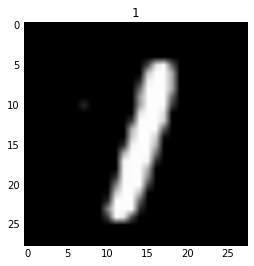

In [5]:
i = np.random.randint(0, train_x.shape[0])
plt.imshow(train_x[i,:], cmap = plt.cm.gray)
plt.title(train_y[i])

In [21]:
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)
print train_y.shape, test_y.shape

(60000, 10) (10000, 10)


## Baseline - MLP
- ignored

## CNN - what features look like
- shadow VGG-like

In [6]:
K.image_dim_ordering()

'th'

In [28]:
image = layers.Input(shape = (1, 28, 28))


image_model = models.Sequential()
image_model.add(layers.Convolution2D(32, 3, 3, activation="relu", 
                                     input_shape = (1, 28, 28)))
image_model.add(layers.Convolution2D(32, 3, 3, activation="relu"))
image_model.add(layers.MaxPooling2D( (2, 2) ))
image_model.add(layers.Dropout(0.25))
image_model.add(layers.Flatten())

feats = image_model(image)

classifier_model = models.Sequential()
classifier_model.add(layers.Dense(output_dim=128, 
                                  batch_input_shape = image_model.output_shape,
                                  activation = "relu"))
classifier_model.add(layers.Dense(output_dim = 10, activation="softmax"))

scores = classifier_model(feats)

model = models.Model(input = image, output=scores)
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", 
         metrics = ["accuracy"])

In [29]:
model.fit(train_x.reshape(-1, 1, 28, 28), 
          train_y, 
          validation_data = (test_x.reshape(-1, 1, 28, 28), test_y),
          batch_size = 64, nb_epoch = 5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s - loss: 0.1368 - acc: 0.9580 - val_loss: 0.0466 - val_acc: 0.9852
Epoch 2/5
60000/60000 [==============================] - 10s - loss: 0.0471 - acc: 0.9853 - val_loss: 0.0341 - val_acc: 0.9898
Epoch 3/5
60000/60000 [==============================] - 10s - loss: 0.0356 - acc: 0.9890 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 4/5
60000/60000 [==============================] - 10s - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0408 - val_acc: 0.9868
Epoch 5/5
60000/60000 [==============================] - 10s - loss: 0.0228 - acc: 0.9930 - val_loss: 0.0318 - val_acc: 0.9905


In [37]:
get_img_feat = K.function(inputs = [image, K.learning_phase()], outputs = [feats])

In [50]:
img_feat = get_img_feat([train_x[:50].reshape(50, 1, 28, 28), 0])[0]
print img_feat.shape
img_feat.shape[1] == 32 * 12 * 12

(50, 4608)


True

# TODO

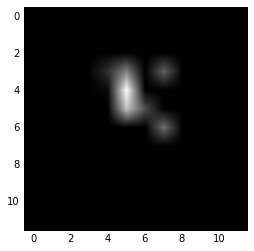

In [59]:
plt.imshow(img_feat.reshape(50, 32, 12, 12)[0, 3], cmap = plt.cm.gray)

## Simple RNN with smart Initialization
- Image augmentation?